# SIGAI@UCF Demographics Report

by: [@ionlights](https://github.com/ionlights), last updated: Wed, Sep 19, 2018

---

Importing dependencies, to do visualization and data cleaning.

In [1]:
import numpy as np
import pandas as pd


import seaborn as sns
sns.set_style(style="darkgrid")

In [2]:
ups = pd.read_csv("signup.csv")
ins = pd.read_csv("signin.csv")

In [3]:
ups.drop(columns=["First name", "Filtered First Name", "Were you here for the first meeting? (Did you get a key to the super computer?)"], inplace=True)

In [4]:
replace = {
    "Email (@knights.ucf.edu)": "email",
    "Academic standing [Undergraduate]": "ugrad",
    "Academic standing [Graduate (Master's)]": "grad_ms",
    "Academic standing [Graduate (Ph.D)]": "grad_phd",
    "Hispanic/Latino": "latinx",
    "Major": "major",
    "Minor(s)": "minors",
    "Are you interested in research?": "research",
    "How'd you hear about us? (please give detail :) )": "traceroute",
    "Race": "race",
    "Gender": "gender",
}
ups.rename(columns=replace, inplace=True)
ups.head()

,Timestamp,email,major,minors,ugrad,grad_ms,grad_phd,research,latinx,race,gender,traceroute
0,8/29/2018 18:13:22,matthewkurtz@knights.ucf.edu,Computer Science,NaN,3.0,NaN,NaN,Maybe,No,White,Male,Hack UCF
1,8/29/2018 18:13:22,lakshman@knights.ucf.edu,Mathematics,Computer Science,3.0,NaN,NaN,Yes,No,Asian,Male,John
2,8/29/2018 18:13:26,gabaldonot@knights.ucf.edu,Computer Science,NaN,4.0,NaN,NaN,Yes,Yes,White,Male,Word of mouth/Facebook
3,8/29/2018 18:13:29,brandon.silva209@knights.ucf.edu,Computer Engineering,Math,2.0,NaN,NaN,Yes,No,White,Male,NaN
4,8/29/2018 18:13:42,stephentesta@knights.ucf.edu,Mathematics,Actuarial Science,4.0,NaN,NaN,Yes,No,White,Male,Friends


In [5]:
from IPython.display import Markdown
display(Markdown(f"So far, seems like we have **{ups.email.unique().shape[0]}** members which have come to at least one meeting."))

So far, seems like we have **106** members which have come to at least one meeting.

In [6]:
mem = ups.drop_duplicates(subset=["email"], keep="first")
mem.drop(columns=["traceroute"])

mem.latinx = mem.latinx.map({"Yes": True, "No": False})

display(mem.shape)
display(mem.head())

(106, 12)

,Timestamp,email,major,minors,ugrad,grad_ms,grad_phd,research,latinx,race,gender,traceroute
0,8/29/2018 18:13:22,matthewkurtz@knights.ucf.edu,Computer Science,NaN,3.0,NaN,NaN,Maybe,False,White,Male,Hack UCF
1,8/29/2018 18:13:22,lakshman@knights.ucf.edu,Mathematics,Computer Science,3.0,NaN,NaN,Yes,False,Asian,Male,John
2,8/29/2018 18:13:26,gabaldonot@knights.ucf.edu,Computer Science,NaN,4.0,NaN,NaN,Yes,True,White,Male,Word of mouth/Facebook
3,8/29/2018 18:13:29,brandon.silva209@knights.ucf.edu,Computer Engineering,Math,2.0,NaN,NaN,Yes,False,White,Male,NaN
4,8/29/2018 18:13:42,stephentesta@knights.ucf.edu,Mathematics,Actuarial Science,4.0,NaN,NaN,Yes,False,White,Male,Friends


In [7]:
ugrads = pd.DataFrame(columns=["time", "year", "count"], 
                      data=mem.ugrad.fillna(0).value_counts().sort_index().reset_index()\
                      .rename(columns={"index": "year", "ugrad": "count"}))
ugrads.time = "Undergraduate"
ugrads

,time,year,count
0,Undergraduate,0.0,3
1,Undergraduate,1.0,20
2,Undergraduate,2.0,19
3,Undergraduate,3.0,26
4,Undergraduate,4.0,25
5,Undergraduate,5.0,13


In [8]:
grd_ms = pd.DataFrame(columns=["time", "year", "count"], 
                      data=mem.grad_ms.fillna(0).value_counts().sort_index().reset_index()\
                      .rename(columns={"index": "year", "grad_ms": "count"}))
grd_ms.time = "Master's"
grd_ms

,time,year,count
0,Master's,0.0,103
1,Master's,1.0,3


In [9]:
grd_ph = pd.DataFrame(columns=["time", "year", "count"], 
                      data=mem.grad_phd.fillna(0).value_counts().sort_index().reset_index()\
                      .rename(columns={"index": "year", "grad_phd": "count"}))
grd_ph.time = "Doctorate"
grd_ph

,time,year,count
0,Doctorate,0.0,104
1,Doctorate,1.0,2


In [10]:
mg_grd = pd.DataFrame(columns=["time", "year", "count"])
mg_grd = mg_grd.append(ugrads)
mg_grd = mg_grd.append(grd_ms)
mg_grd = mg_grd.append(grd_ph)
mg_grd = mg_grd[mg_grd.year != 0]
mg_grd["count"] = mg_grd["count"] / ups.email.unique().shape[0]

mg_grd.rename(columns={"time": "Academic Career", "count": "How many?", "year": "What year are they in?"}, inplace=True)

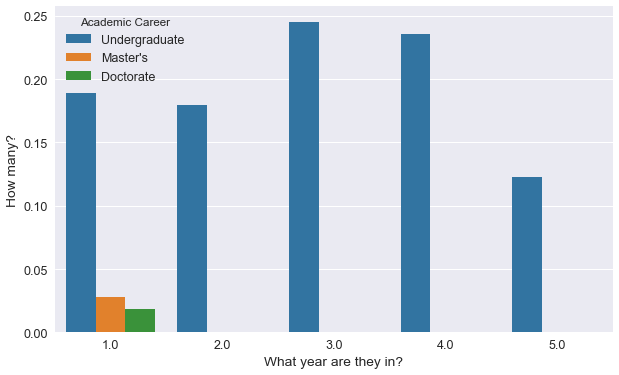

In [24]:
import matplotlib.pyplot as plt
sns.set_context("notebook", font_scale=1.25, rc={"lines.linewidth": 2.5})
fig = plt.figure(figsize=(10, 6))
sns.barplot(x="What year are they in?", y="How many?", data=mg_grd, hue="Academic Career")

In [22]:
mg_maj = pd.DataFrame(columns=["degree", "count"])
mg_maj["degree"] = mem.major.unique()
mg_maj["count"] = mg_maj.apply(lambda x: mem[mem["major"] == x["degree"]].shape[0], axis=1)
mg_maj

,degree,count
0,Computer Science,73
1,Mathematics,3
2,Computer Engineering,14
3,Psychology,2
4,Aerospace Engineering,1
5,"Computer Science, Mathematics",3
6,Other,2
7,Information Technology,4
8,"Mathematics, Physics",1
9,"Computer Science, Biotechnology",1


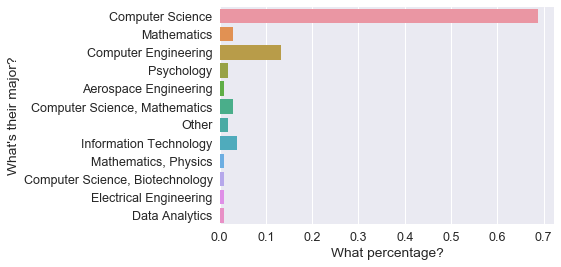

In [21]:
mg_maj["count"] = mg_maj["count"] / mem.shape[0]
mg_maj.rename(columns={"degree": "What's their major?", "count": "What percentage?"}, inplace=True)
sns.barplot(y="What's their major?", x="What percentage?", data=mg_maj)

In [26]:
mg_rac = pd.DataFrame(columns=["race", "count"])
mg_rac["race"] = mem.race.unique()
mg_rac["count"] = mg_rac.apply(lambda x: mem[mem["race"] == x["race"]].shape[0], axis=1)
mg_rac.iloc[mg_rac.shape[0]] = 

sns.barplot(y="What's their racial background?", x="What percentage of the club do they constitute?", data=mg_rac)

ValueError: cannot index with vector containing NA / NaN values